In [65]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

train_path1="./train/African"
train_path2="./train/Asian"
test_path="./test"
x=[]
y=[]
test=[]
id=[]

#匯入資料
for i in os.listdir(train_path1):
    img=cv2.imread(os.path.join(train_path1,i))
    img = cv2.resize(img,(250, 250))
    x.append(img)
    
for i in os.listdir(train_path2):
    img=cv2.imread(os.path.join(train_path2,i))
    img = cv2.resize(img,(250, 250))
    x.append(img)

for i in os.listdir(train_path1):
    y.append(1)
    
for i in os.listdir(train_path2):
    y.append(0)
    
for i in os.listdir(test_path):
    img=cv2.imread(os.path.join(test_path,i))
    img = cv2.resize(img, (250, 250))
    test.append(img)
    id.append(i.split(".")[0])
      
x = np.array(x)
y = np.array(y)    
test = np.array(test) 
index=[i for i in range(len(x))]

#打亂
np.random.shuffle(index)
x=x[index]
y=y[index]

#分割
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

#模型
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = train_x.shape[1:]))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
#model.summary()
model.fit(x,y,epochs=10,batch_size=64,validation_data=(val_x, val_y))

Epoch 1/10
14/14 [==============================] - 4s 259ms/step - loss: 518.5552 - accuracy: 0.5214 - val_loss: 0.6919 - val_accuracy: 0.5397
Epoch 2/10
14/14 [==============================] - 3s 241ms/step - loss: 0.8560 - accuracy: 0.5083 - val_loss: 0.6924 - val_accuracy: 0.5119
Epoch 3/10
14/14 [==============================] - 3s 240ms/step - loss: 0.7026 - accuracy: 0.5131 - val_loss: 0.6924 - val_accuracy: 0.5159
Epoch 4/10
14/14 [==============================] - 3s 240ms/step - loss: 0.6895 - accuracy: 0.5286 - val_loss: 0.6924 - val_accuracy: 0.5238
Epoch 5/10
14/14 [==============================] - 3s 240ms/step - loss: 0.6842 - accuracy: 0.5417 - val_loss: 0.6920 - val_accuracy: 0.5198
Epoch 6/10
14/14 [==============================] - 3s 240ms/step - loss: 0.6786 - accuracy: 0.5381 - val_loss: 0.6891 - val_accuracy: 0.5556
Epoch 7/10
14/14 [==============================] - 3s 240ms/step - loss: 0.6687 - accuracy: 0.5607 - val_loss: 0.6767 - val_accuracy: 0.5992
Epoc

In [ ]:
#train_loss與val_loss都有收斂，訓練情況良好

8/8 [==============================] - 0s 33ms/step


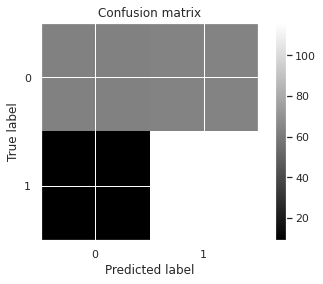

In [70]:
#混淆矩陣
predictions = (model.predict(val_x) > 0.5) 
confusion = confusion_matrix(val_y, predictions.reshape(-1))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [71]:
#AUROC
false_positive_rate, recall, thresholds = roc_curve(val_y, predictions.reshape(-1))  
roc_auc = auc(false_positive_rate, recall)  
print('AUROC=%0.2f' %roc_auc)
 
model.save('elephant.h5')

AUROC=0.71


In [72]:
del model 
model = load_model('elephant.h5')
predictions = model.predict(test)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'ID':id, 'result':predicted_val})
submission_df.to_csv("elephant.csv", index=False)

6/6 [==============================] - 0s 34ms/step
